<a href="https://colab.research.google.com/github/cesarcostar/GPI-BRICS/blob/main/Analise_GPI_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Análise Global Peace Index 2023, BRICS - Fonte: https://www.visionofhumanity.org/public-release-data/

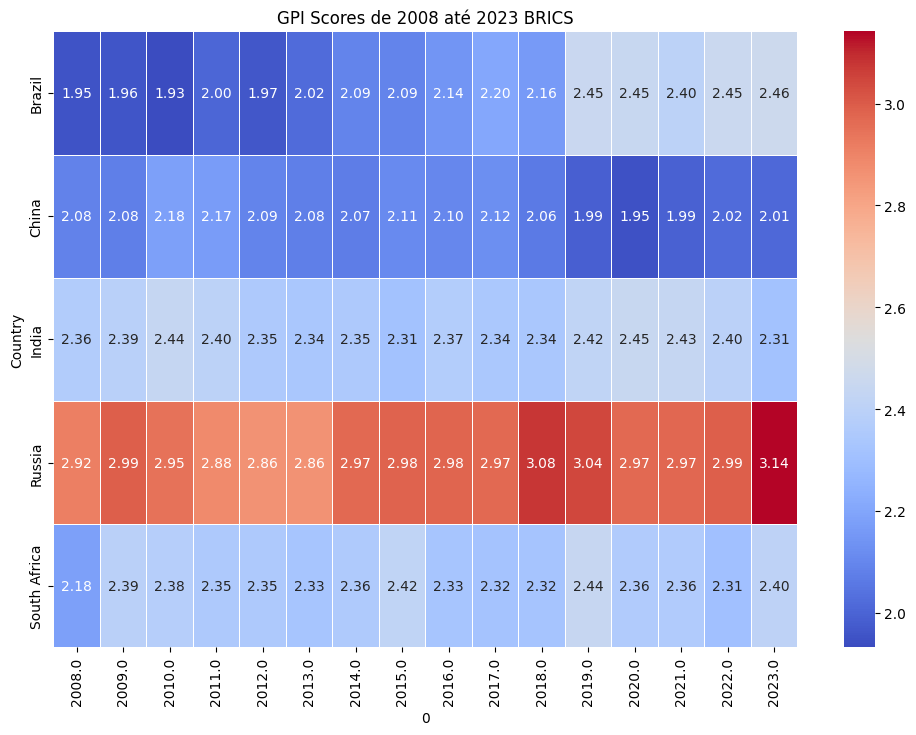

In [15]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Caminho do arquivo
new_file_path = '/content/GPI-2023-overall-scores-and-domains-2008-2023.xlsx'

# Carregando e limpando os dados
new_df_overall_scores = pd.read_excel(new_file_path, sheet_name='Overall Scores', skiprows=2)
new_df_overall_scores.columns = new_df_overall_scores.iloc[0]
new_df_overall_scores = new_df_overall_scores[1:]

# Filtrando os dados para os países selecionados
selected_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
new_df_selected_countries = new_df_overall_scores[new_df_overall_scores['Country'].isin(selected_countries)]

# Removendo colunas com valores NaN e definindo o índice como 'Country'
new_df_selected_countries = new_df_selected_countries.dropna(axis=1, how='all').set_index('Country').drop(columns=['iso3c'])

# Gerando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(new_df_selected_countries.astype(float), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('GPI Scores de 2008 até 2023 BRICS')
plt.show()



1. Mapa de Calor:
O mapa de calor mostra os Índices Globais de Paz (GPI) para Brasil, Rússia, Índia, China e África do Sul de 2008 a 2023. Cores mais claras indicam países mais pacíficos (pontuações GPI baixas), enquanto cores mais escuras indicam menos paz (pontuações GPI altas).

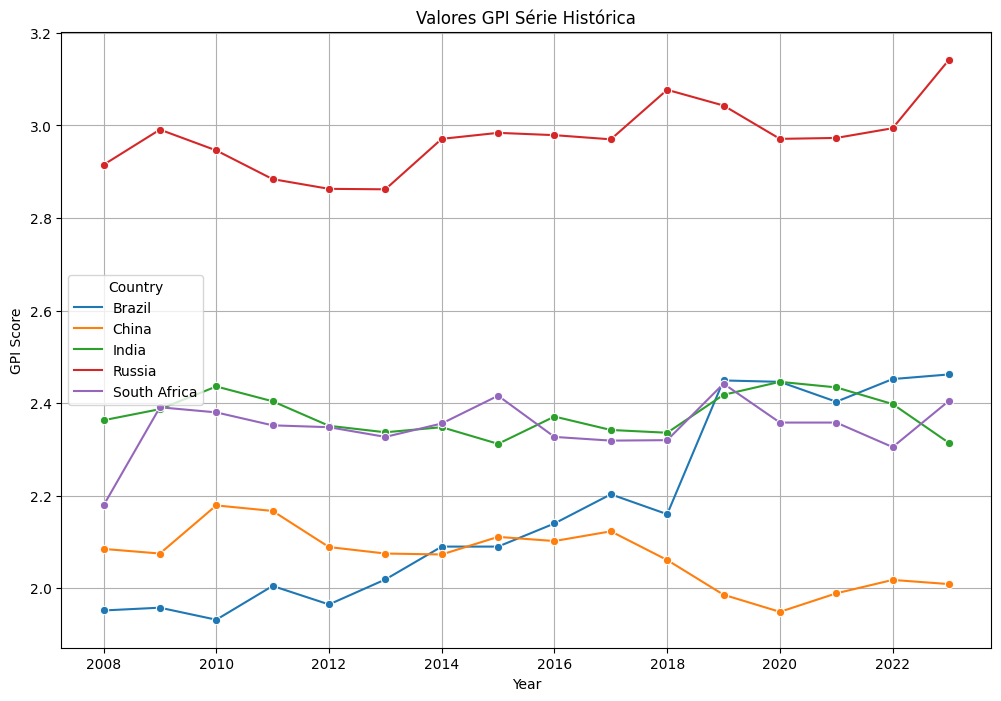

In [16]:
# Criando o gráfico de linha com dados corrigidos
new_df_long_format = pd.melt(new_df_selected_countries.reset_index(), id_vars=['Country'],
                             value_vars=new_df_selected_countries.columns,
                             var_name='Year', value_name='GPI Score')
new_df_long_format['Year'] = new_df_long_format['Year'].astype(float).astype(int)

plt.figure(figsize=(12, 8))
sns.lineplot(data=new_df_long_format, x='Year', y='GPI Score', hue='Country', marker="o")
plt.title('Valores GPI Série Histórica')
plt.grid(True)
plt.show()



2. Gráfico de Linha:
O gráfico de linha ilustra a progressão dos escores GPI dos mesmos cinco países ao longo dos anos. Cada linha de cor diferente representa um país, permitindo uma comparação visual clara das tendências de paz ao longo do tempo.

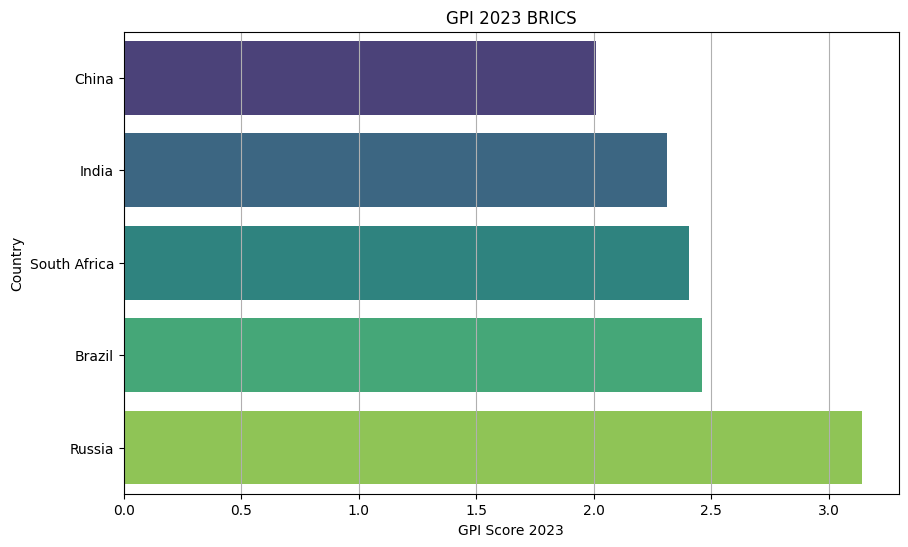

In [17]:
# Criando o gráfico de barras para 2023
new_df_2023 = new_df_selected_countries[[2023]].reset_index()
new_df_2023.columns = ['Country', 'GPI Score 2023']
new_df_2023 = new_df_2023.sort_values(by='GPI Score 2023', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='GPI Score 2023', y='Country', data=new_df_2023, palette='viridis')
plt.title('GPI 2023 BRICS')
plt.grid(axis='x')
plt.show()



3. Gráfico de Barras:
Este gráfico apresenta os escores GPI de 2023 para os cinco países selecionados. As barras estão organizadas em ordem crescente de escore GPI, oferecendo uma visão clara da classificação de paz de cada país neste ano específico.

<ipython-input-18-bdfc66af5774>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  new_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


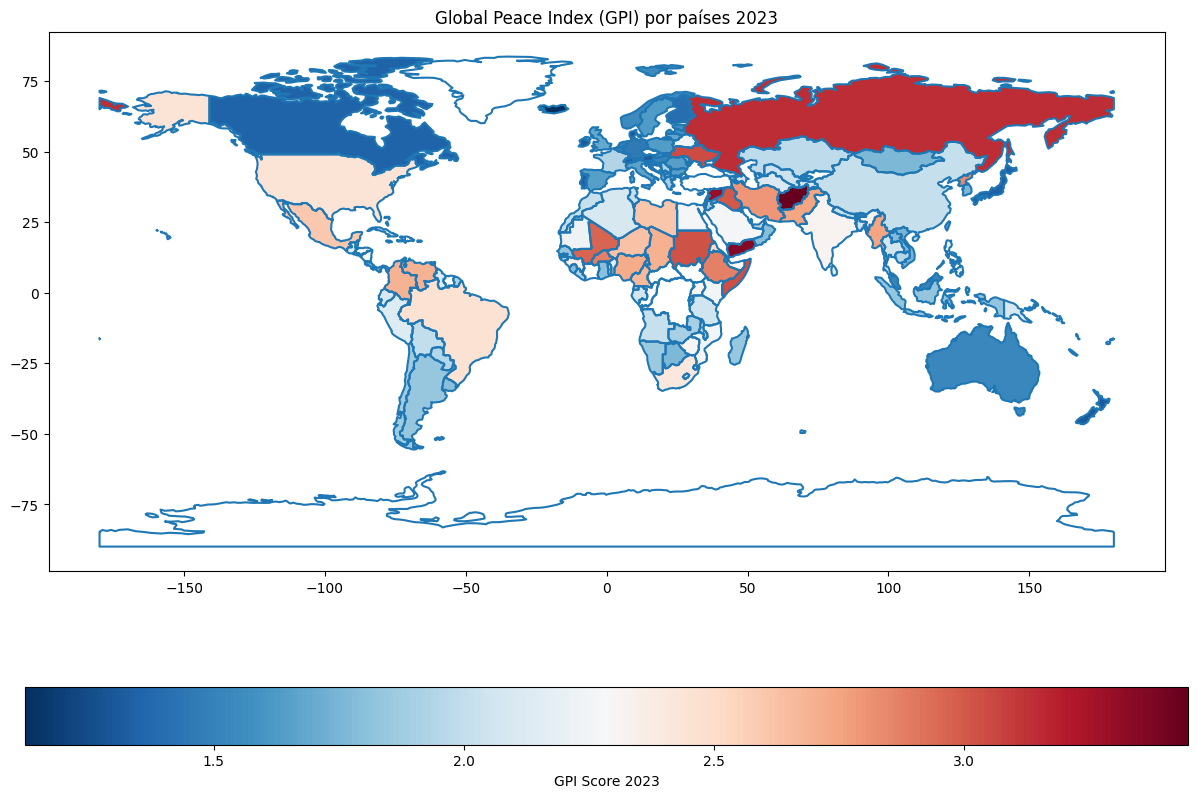

In [18]:
# Criando o mapa coroplético para 2023
new_df_2023_all_countries = new_df_overall_scores[['Country', 2023]].dropna()
new_df_2023_all_countries.columns = ['Country', 'GPI Score 2023']
new_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
new_world = new_world.merge(new_df_2023_all_countries, how="left", left_on="name", right_on="Country")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
new_world.boundary.plot(ax=ax)
new_world.plot(column='GPI Score 2023', ax=ax, legend=True, cmap='RdBu_r',
               legend_kwds={'label': "GPI Score 2023", 'orientation': "horizontal"})
plt.title('Global Peace Index (GPI) por países 2023')
plt.show()


4. Mapa Coroplético:
O mapa coroplético exibe os escores GPI de todos os países do mundo em 2023. A escala de cores varia do azul ao vermelho; azul representa países mais pacíficos com escores GPI baixos, enquanto vermelho indica países menos pacíficos com escores GPI altos.